Installing necessary packages

In [106]:
!pip install ucimlrepo

In [107]:
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

Loading of dataset

In [108]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# metadata
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)


{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [109]:
print(y['readmitted'].unique())

['NO' '>30' '<30']


Preprocessing the target label

In [110]:
# Preprocessing the target label

def convert_target_label(value):
  if value == ">30" or value == "NO":
    return 0
  else:
    return 1
train_y = y['readmitted'].apply(convert_target_label).apply(pd.Series)

Creating visualizations for predictor variable

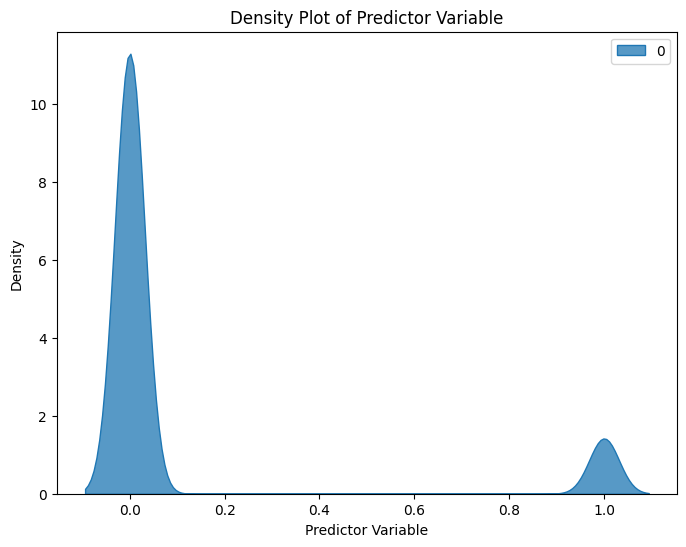

In [111]:
# Creating the density plot (KDE plot)
plt.figure(figsize=(8, 6))
sns.kdeplot(train_y, fill=True, color='skyblue', alpha=0.75)
plt.xlabel('Predictor Variable')
plt.ylabel('Density')
plt.title('Density Plot of Predictor Variable')
plt.show()

In [112]:
train_y.value_counts().index

MultiIndex([(0,),
            (1,)],
           names=[0])

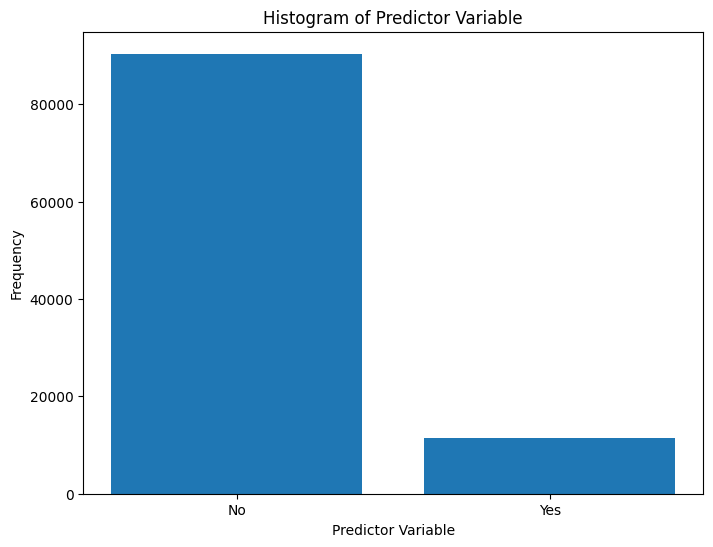

In [113]:
#Visualizing the target variable

# Creating the histogram
plt.figure(figsize=(8, 6))
value_counts = train_y.value_counts()
plt.bar(x =['No','Yes'],height = value_counts.values)
plt.xlabel('Predictor Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Predictor Variable')
plt.show()

Dataset Cleaning

In [114]:
# Categorizing the age column
import pandas as pd

data = X
# Replacing categorical values of age with five different classes i.e., child, teen, adult, middle_age, and old.
data.age = data['age'].replace('[0-10)', 'child')
data.age = data['age'].replace('[10-20)', 'teen')
data.age = data['age'].replace(['[20-30)', '[30-40)'], 'adult')
data.age = data['age'].replace(['[40-50)', '[50-60)'], 'middle_age')
data.age = data['age'].replace(['[60-70)', '[70-80)', '[80-90)', '[90-100)'], 'old')
print(data.head(100))

               race  gender         age weight  admission_type_id  \
0         Caucasian  Female       child    NaN                  6   
1         Caucasian  Female        teen    NaN                  1   
2   AfricanAmerican  Female       adult    NaN                  1   
3         Caucasian    Male       adult    NaN                  1   
4         Caucasian    Male  middle_age    NaN                  1   
..              ...     ...         ...    ...                ...   
95        Caucasian    Male         old    NaN                  2   
96        Caucasian  Female         old    NaN                  1   
97        Caucasian    Male         old    NaN                  1   
98            Other  Female  middle_age    NaN                  1   
99              NaN    Male       adult    NaN                  2   

    discharge_disposition_id  admission_source_id  time_in_hospital  \
0                         25                    1                 1   
1                          1 

<ipython-input-114-cce49a4fd90d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age = data['age'].replace('[0-10)', 'child')
<ipython-input-114-cce49a4fd90d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age = data['age'].replace('[10-20)', 'teen')
<ipython-input-114-cce49a4fd90d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [115]:
# Dropping few columns which contain NaN values.
data = data.drop(columns=['weight', 'payer_code', 'examide', 'citoglipton'], axis=1)
print(data.head())

              race  gender         age  admission_type_id  \
0        Caucasian  Female       child                  6   
1        Caucasian  Female        teen                  1   
2  AfricanAmerican  Female       adult                  1   
3        Caucasian    Male       adult                  1   
4        Caucasian    Male  middle_age                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1                 1   
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   

          medical_specialty  num_lab_procedures  num_procedures  ...  \
0  Pediatrics-Endocrinology                  41               0  ...   
1                       NaN                  59               0  ...

In [116]:
# Printing the dataset after cleaning.
print(data.head())

              race  gender         age  admission_type_id  \
0        Caucasian  Female       child                  6   
1        Caucasian  Female        teen                  1   
2  AfricanAmerican  Female       adult                  1   
3        Caucasian    Male       adult                  1   
4        Caucasian    Male  middle_age                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1                 1   
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   

          medical_specialty  num_lab_procedures  num_procedures  ...  \
0  Pediatrics-Endocrinology                  41               0  ...   
1                       NaN                  59               0  ...

In [117]:
# Printing the unique values for each column after cleaning the dataset.
for col in data:
    print(f"{col} = {data[col].unique()}")

race = ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
gender = ['Female' 'Male' 'Unknown/Invalid']
age = ['child' 'teen' 'adult' 'middle_age' 'old']
admission_type_id = [6 1 2 3 4 5 8 7]
discharge_disposition_id = [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id = [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital = [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
medical_specialty = ['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology

In [118]:
# Dealing with A1Cresult results
# Indicates the range of the result or if the test was not taken. Values: >8 if the result was greater than 8%,
# >7 if the result was greater than 7% but less than 8%, normal if the result was less than 7%, and none if not measured.

# Convert the values of this A1Cresult into two additioanl columns. First one -> `test_performed` = 1/0.
# Second column - => `test_value` = 3.5 for norm, 7.0 for >7 and 8.0 for >8.
def convert_A1Cresult(value):
  if value == 'None':
    return 0, 0
  elif value == 'Norm':
    return 1, 3.5
  elif value.startswith('>') and len(value) > 1:
    return 1, int(value[1:])
  else:
    raise ValueError("Unknown category: " + value)

#data[["A1CTestPerformed", "A1CTestValue"]] = data['A1Cresult'].apply(convert_A1Cresult).apply(pd.Series)

In [119]:
# Dealing with age feature
# Preprocess the age values from ['child' 'teen' 'adult' 'middle_age' 'old'] to [1, 2, 3, 4, 5]
def convert_age(value):
  if value == "child":
    return 1
  elif value == "teen":
    return 2
  elif value == "adult":
    return 3
  elif value == "middle_age":
    return 4
  elif value == "old":
    return 5

data[['age_converted']] = data['age'].apply(convert_age).apply(pd.Series)

In [120]:
# Dealing with gender feature
def convert_gender(value):
  if value == 'Male':
    return 1, 0, 0
  elif value == 'Female':
    return 0, 1, 0
  else:
    return 0, 0, 1

data[['Gender_Male', 'Gender_Female', 'Gender_Unknown']] = data['gender'].apply(convert_gender).apply(pd.Series)

In [121]:
# Dealing with race feature
# Preprocess the race values from ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic'] to one-hot encoding.
def convert_race(value):
  if value == 'Caucasian':
    return 1, 0, 0, 0, 0 # Caucasian, AfricanAmerican, Asian, Hispanic, Other
  elif value == 'AfricanAmerican':
    return 0, 1, 0, 0, 0
  elif value == 'Asian':
    return 0, 0, 1, 0, 0
  elif value == 'Hispanic':
    return 0, 0, 0, 1, 0
  else:
    return 0, 0, 0, 0, 1

data[['Caucasian', 'AfricanAmerican', 'Asian', 'Hispanic', 'Other']] = data['race'].apply(convert_race).apply(pd.Series)

In [122]:
# Medical Speciality of admitting physician feature should be treated like even the missing value should be a feature.
import pandas as pd

def convert_medical_spec(value):
  if value == '?' or pd.isna(value):
    return "missing"
  else:
    return value

data[['medical_specialty']] = data['medical_specialty'].apply(convert_medical_spec).apply(pd.Series)

In [123]:
print(data['medical_specialty'].unique())

['Pediatrics-Endocrinology' 'missing' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunology' 'Surgery-Maxillofacial'
 'Pediatrics-InfectiousDi

In [124]:
print(type(data.iloc[0]['medical_specialty']))

<class 'str'>


In [125]:
# Dealing with diag_1 -> primary diagnosis.
def convert_diag_1(value):
  if value == "?" or pd.isna(value):
    return "missing"
  else:
    return value

data[['diag_1']] = data['diag_1'].apply(convert_diag_1).apply(pd.Series)

In [126]:
# Dealing with diabetesMed feature
def convert_diabetesMed(value):
  if value == "yes":
    return 1
  else:
    return 0

data[['diabetesMed']] = data['diabetesMed'].apply(convert_diabetesMed).apply(pd.Series)

In [127]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'age_converted',
       'Gender_Male', 'Gender_Female', 'Gender_Unknown', 'Caucasian',
       'AfricanAmerican', 'Asian', 'Hispanic', 'Other'],
      dtype='object')

In [128]:
### removing rows where discharged due to death
values = data.loc[data['discharge_disposition_id'].isin([11,13,14,19,20,21]) ,'discharge_disposition_id']
print(pd.Series.unique(values))
labels = values.index
data.drop(index = labels,inplace = True)
train_y.drop(index = labels,inplace = True)
print(data.shape,train_y.shape)

[11 14 13 20 19]
(99343, 52) (99343, 1)


In [129]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'age_converted',
       'Gender_Male', 'Gender_Female', 'Gender_Unknown', 'Caucasian',
       'AfricanAmerican', 'Asian', 'Hispanic', 'Other'],
      dtype='object')

Adding Diagnosis_1_428' and 'diag_2_250'

In [130]:
def convert_diag_428(x):
  if x == '428':
    return 1
  else:
    return 0
def convert_diag_250(x):
  if x == '250':
    return 1
  else:
    return 0
data['diag_1_428'] = data['diag_1'].apply(convert_diag_428)
data['diag_2_250'] = data['diag_2'].apply(convert_diag_250)

In [131]:
data['diag_1_428'].unique()

array([0, 1])

In [132]:
print(type(data.iloc[0]['diag_1']))

<class 'str'>


In [133]:
print(data.columns.tolist())

['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'age_converted', 'Gender_Male', 'Gender_Female', 'Gender_Unknown', 'Caucasian', 'AfricanAmerican', 'Asian', 'Hispanic', 'Other', 'diag_1_428', 'diag_2_250']


Making plots to visualize variance of each feature.

### Plotting graphs

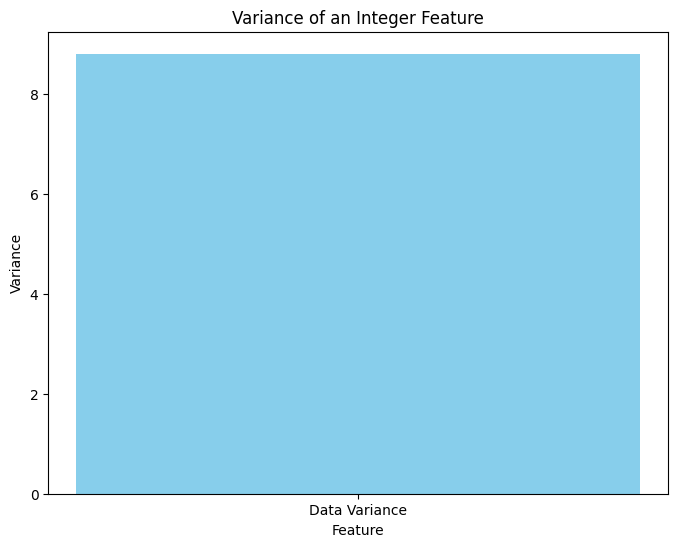

In [134]:
# Calculating the variance of the feature - 'time_in_hospital'
import numpy as np
import matplotlib.pyplot as plt

variance = np.var(data.time_in_hospital)

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar("Data Variance", variance, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.title('Variance of an Integer Feature')
plt.show()

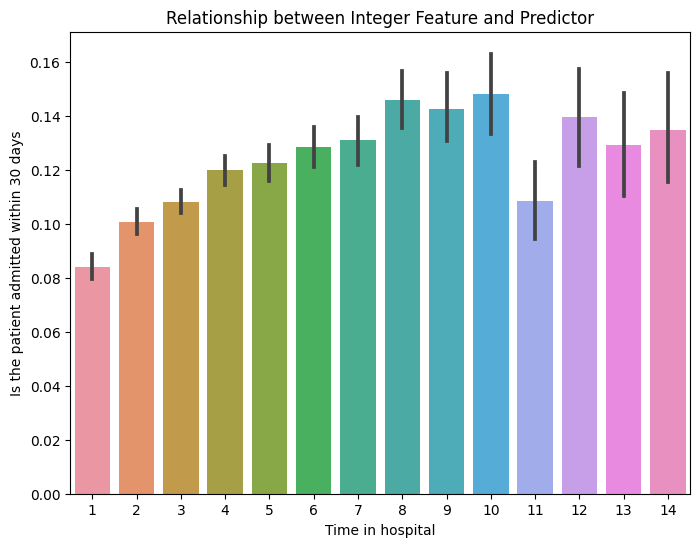

In [135]:
import seaborn as sns

# Creating the scatter plot between time_in_hospital vs predictor
plt.figure(figsize=(8, 6))
sns.barplot(x=data.time_in_hospital, y=train_y[0])
plt.xlabel('Time in hospital')
plt.ylabel('Is the patient admitted within 30 days')
plt.title('Relationship between Integer Feature and Predictor')
plt.show()

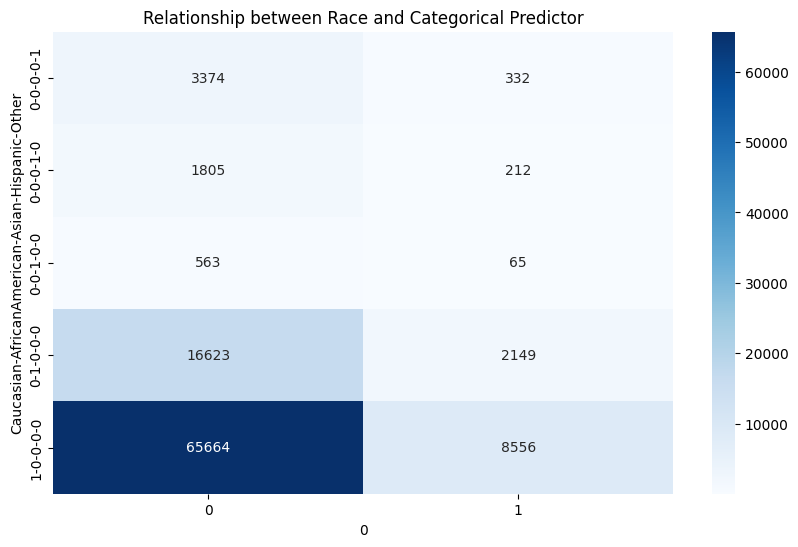

In [136]:
# Creating the grouped bar plot for depicting race vs predictor
plt.figure(figsize=(10, 6))
age_data = data[['Caucasian', 'AfricanAmerican', 'Asian', 'Hispanic', 'Other']]
sns.heatmap(pd.crosstab([data['Caucasian'], data['AfricanAmerican'], data['Asian'], data['Hispanic'], data['Other']], train_y[0]), annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Race and Categorical Predictor')
plt.show()

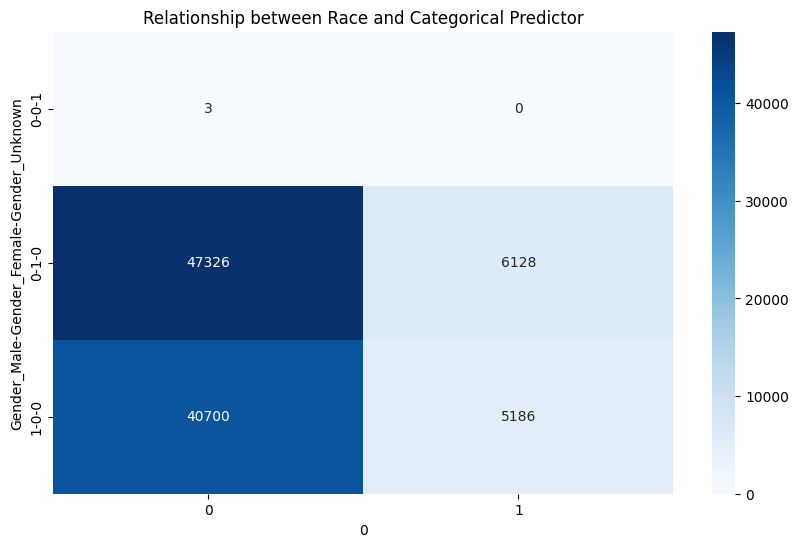

In [137]:
# Creating the grouped bar plot for depicting gender vs predictor
plt.figure(figsize=(10, 6))
age_data = data[['Gender_Male', 'Gender_Female', 'Gender_Unknown']]
sns.heatmap(pd.crosstab([data['Gender_Male'], data['Gender_Female'], data['Gender_Unknown']], train_y[0]), annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Race and Categorical Predictor')
plt.show()

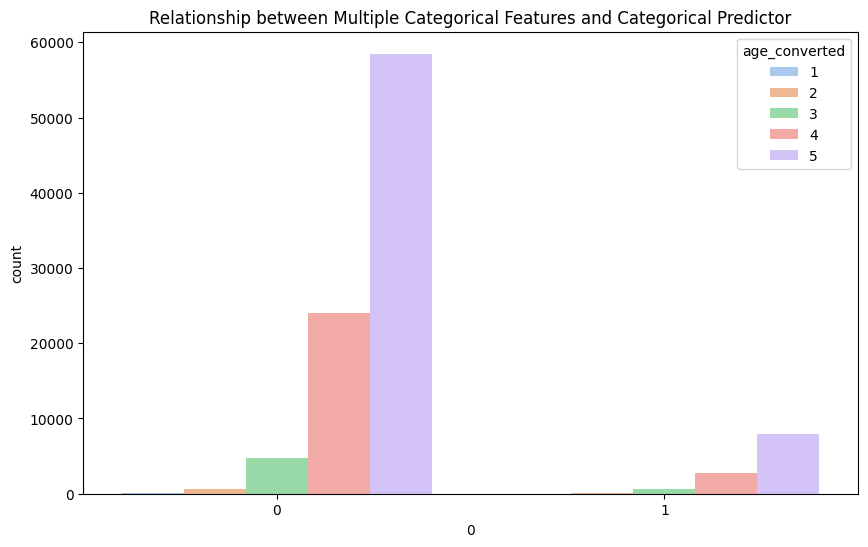

In [138]:
# Creating the counter plot between age and predictor
plt.figure(figsize=(10, 6))
age_data = data[['age_converted']]
sns.countplot(x=train_y[0], hue=data.age_converted, data=age_data, palette='pastel')
plt.title('Relationship between Multiple Categorical Features and Categorical Predictor')
plt.show()

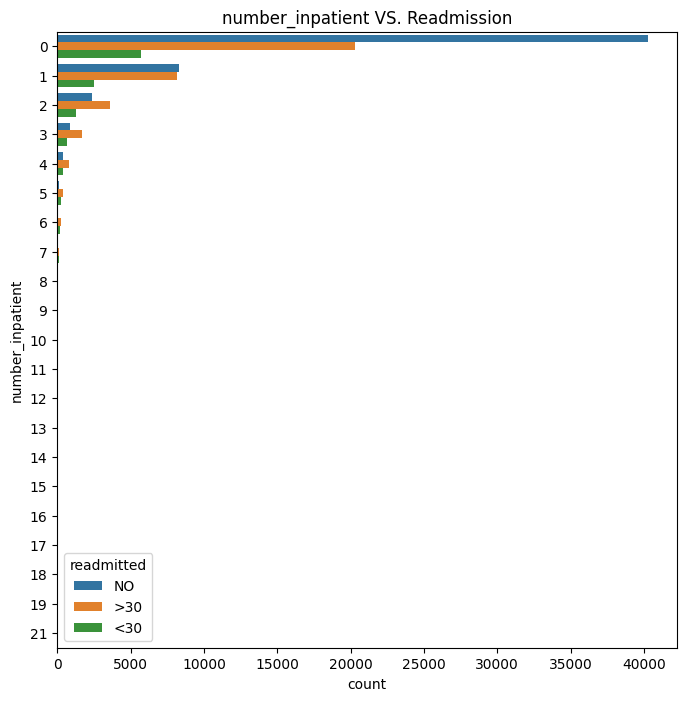

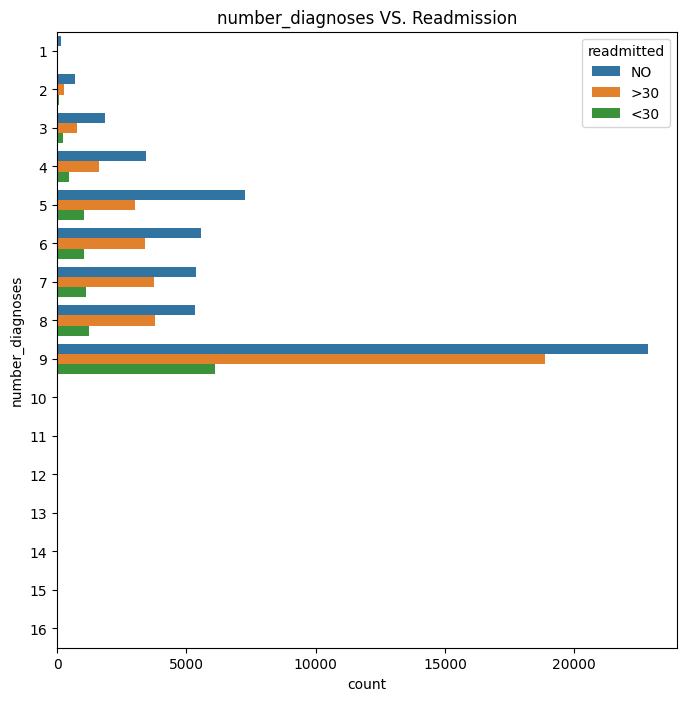

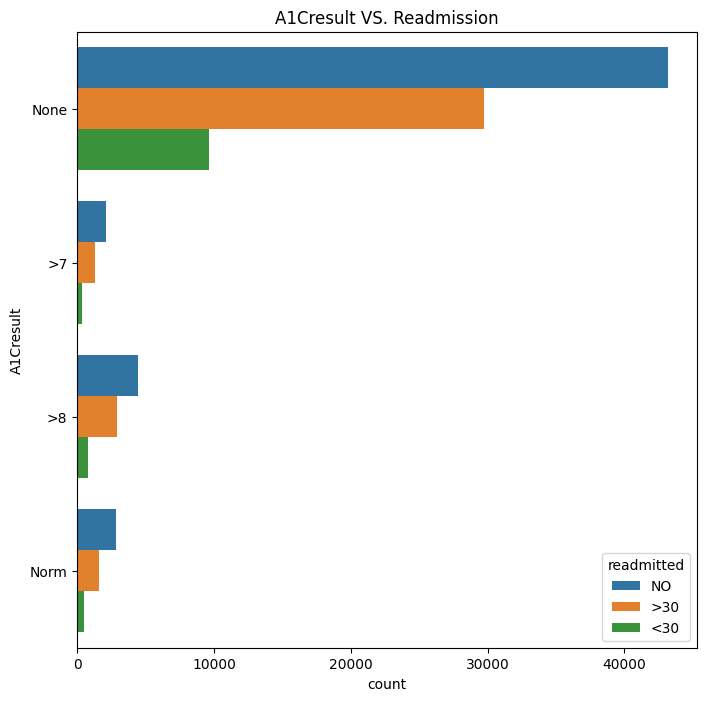

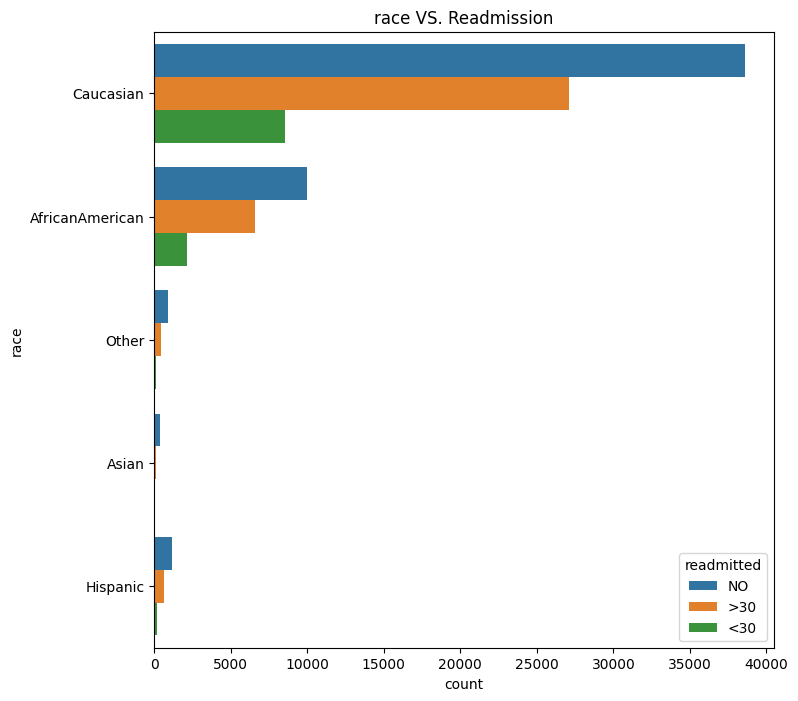

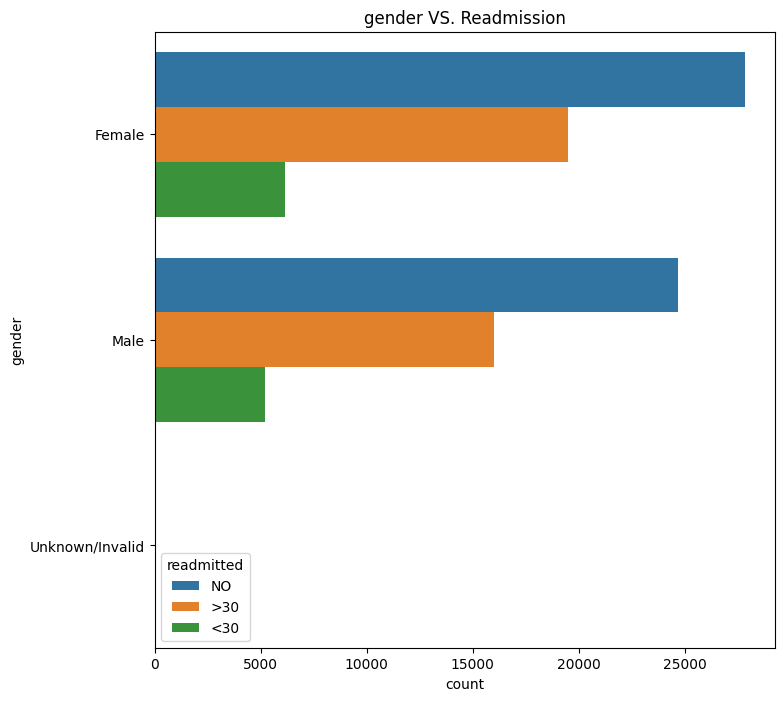

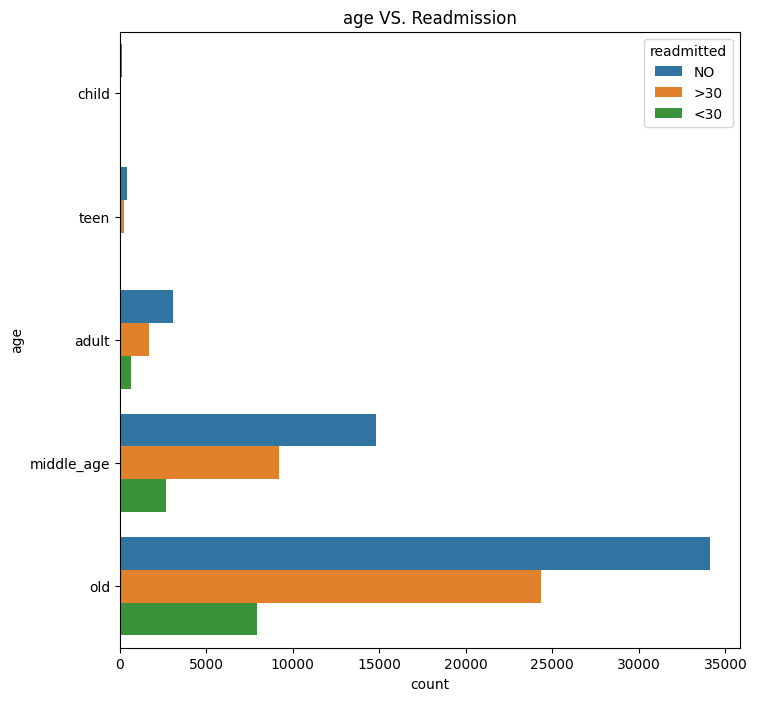

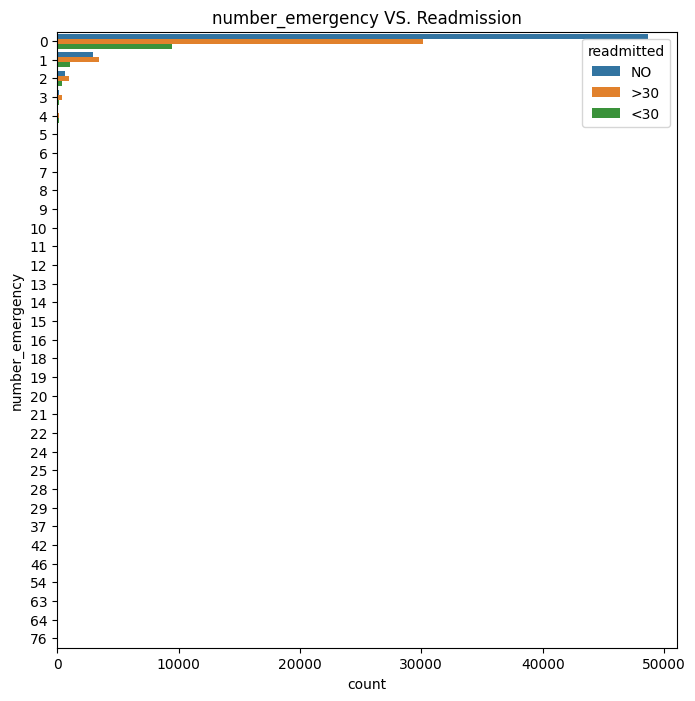

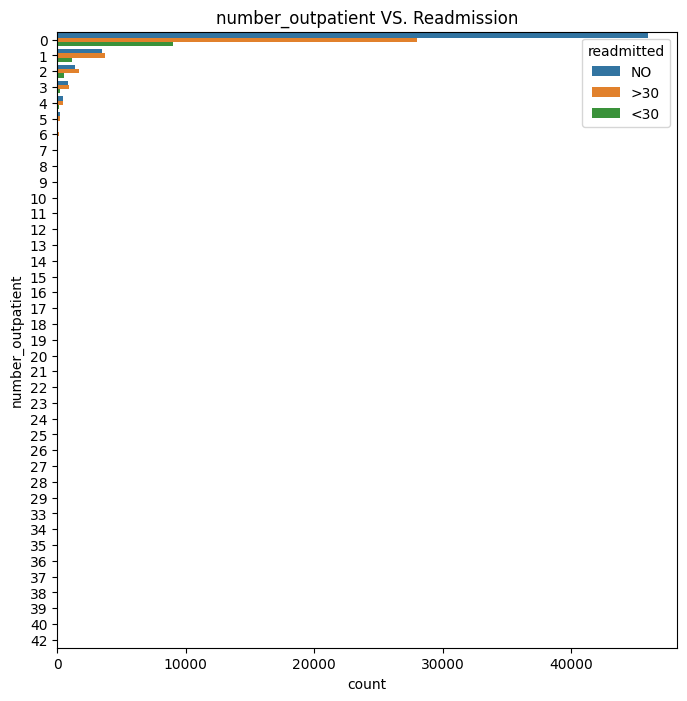

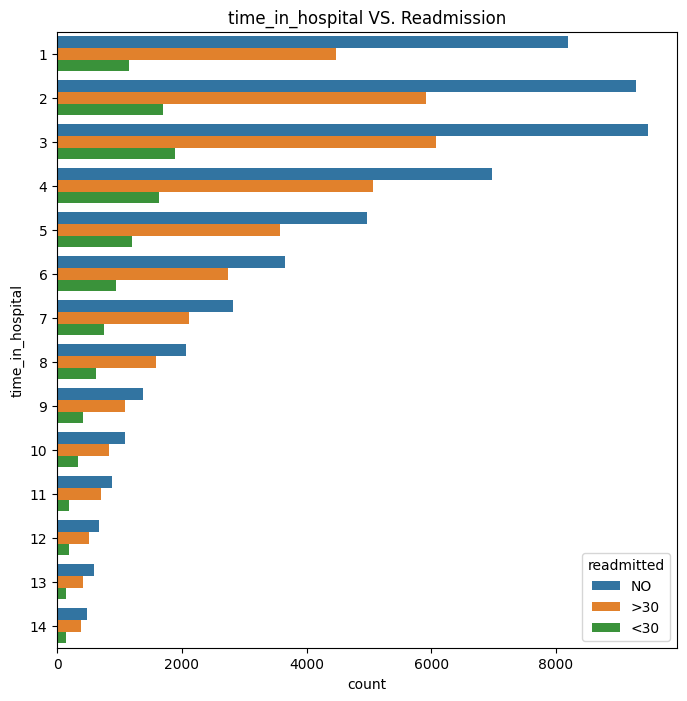

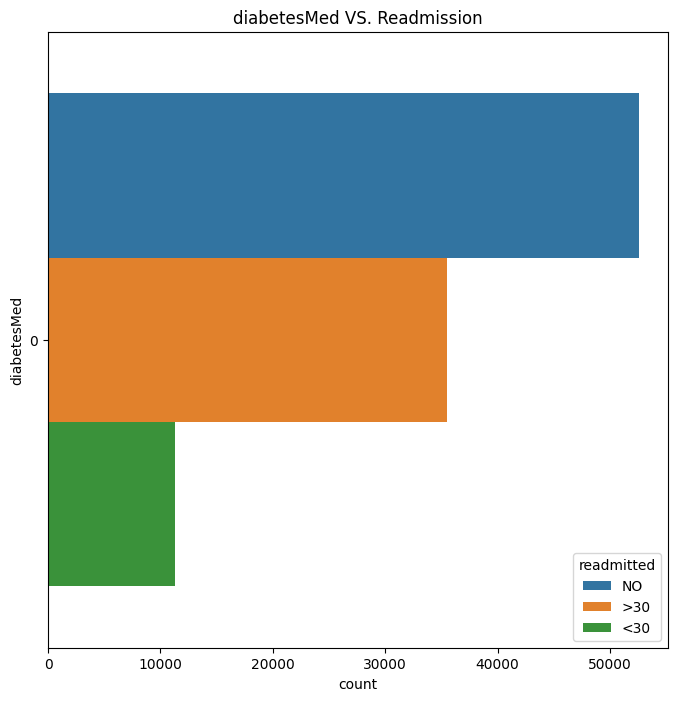

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in ['number_inpatient', 'number_diagnoses','A1Cresult','race','gender','age', 'number_emergency',  'number_outpatient', 'time_in_hospital', 'diabetesMed']:
    fig = plt.figure(figsize=(8,8))
    sns.countplot(y= data[i], hue = y['readmitted']).set_title(f'{i} VS. Readmission')

In [140]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'age_converted',
       'Gender_Male', 'Gender_Female', 'Gender_Unknown', 'Caucasian',
       'AfricanAmerican', 'Asian', 'Hispanic', 'Other', 'diag_1_428',
       'diag_2_250'],
      dtype='ob

In [141]:
train_x = data[['Caucasian', 'AfricanAmerican', 'Asian', 'Hispanic', 'Other', 'Gender_Male', 'Gender_Female', 'Gender_Unknown', 'age_converted', 'A1Cresult', 'number_inpatient', 'number_outpatient', 'time_in_hospital', 'number_diagnoses','diabetesMed', 'number_emergency','diag_1_428',
       'diag_2_250']]


##**Performing train-test splitting**


In [142]:
train_x = pd.get_dummies(train_x, columns=['A1Cresult'])
train_x

,Caucasian,AfricanAmerican,Asian,Hispanic,Other,Gender_Male,Gender_Female,Gender_Unknown,age_converted,number_inpatient,...,time_in_hospital,number_diagnoses,diabetesMed,number_emergency,diag_1_428,diag_2_250,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm
0,1,0,0,0,0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,2,0,...,3,9,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,3,1,...,2,6,0,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0,0,3,0,...,2,7,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,4,0,...,1,5,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,0,0,0,1,0,0,5,0,...,3,9,0,0,0,0,0,1,0,0
101762,0,1,0,0,0,0,1,0,5,1,...,5,9,0,0,0,0,0,0,1,0
101763,1,0,0,0,0,1,0,0,5,0,...,1,13,0,0,0,0,0,0,1,0
101764,1,0,0,0,0,0,1,0,5,1,...,10,9,0,0,0,0,0,0,1,0


In [143]:
# CHecking if there are any columns which have NaN value.
print(train_x.columns[train_x.isna().any()])

Index([], dtype='object')


In [144]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=109) # 70% training and 30% test


In [145]:
print(type(train_x))
print(type(train_y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [146]:
# CHecking if there are any columns which have NaN value.
print(X_train.columns[X_train.isna().any()])

Index([], dtype='object')


In [147]:
print(y_train.columns.to_list())


[0]


In [148]:
train_x.columns

Index(['Caucasian', 'AfricanAmerican', 'Asian', 'Hispanic', 'Other',
       'Gender_Male', 'Gender_Female', 'Gender_Unknown', 'age_converted',
       'number_inpatient', 'number_outpatient', 'time_in_hospital',
       'number_diagnoses', 'diabetesMed', 'number_emergency', 'diag_1_428',
       'diag_2_250', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None',
       'A1Cresult_Norm'],
      dtype='object')

In [149]:

print("train x shape = ", X_train.shape)
print("test x shape = ", X_test.shape)
print("train y shape = ", y_train.shape)
print("test y shape = ", y_test.shape)

train x shape =  (69540, 21)
test x shape =  (29803, 21)
train y shape =  (69540, 1)
test y shape =  (29803, 1)


Fitting SVM to the selected features with linear kernel.

In [150]:
#Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV


#Create a svm Classifier
clf = svm.SVC(kernel = 'linear',C=1.0,degree = 1)

#Train the model using the training sets
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [151]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [152]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy with SVM model on train dataset :",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy with SVM model on test dataset :",metrics.accuracy_score(y_test, y_pred_test))


Accuracy with SVM model on train dataset : 0.8868852459016393
Accuracy with SVM model on test dataset : 0.8843069489648693


Confusion Matrix:
[[26355     0]
 [ 3448     0]]


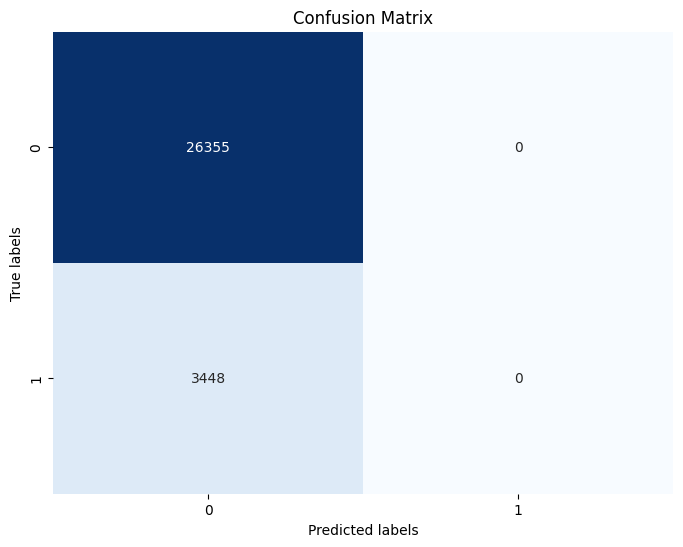

In [153]:
#Plotting the confusion matrix.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm_linear = confusion_matrix(y_test, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_linear)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [154]:
# Calculate FP, TP, TN, and FN rates
FP = cm_linear[0, 1]
TP = cm_linear[1, 1]
TN = cm_linear[0, 0]
FN = cm_linear[1, 0]

# Print the rates
print(f"False Positives (FP): {FP}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

False Positives (FP): 0
True Positives (TP): 0
True Negatives (TN): 26355
False Negatives (FN): 3448


In [155]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*TP/(2*TP + FP + FN)

print("The precision for the SVM with linear kernel is ", precision)
print("The recall for the SVM with linear kernel is ", recall)
print("The f1 score for the SVM with linear kernel is ", f1_score)

The precision for the SVM with linear kernel is  nan
The recall for the SVM with linear kernel is  0.0
The f1 score for the SVM with linear kernel is  0.0


<ipython-input-155-c17ff1940faa>:1: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


We can observe from the above confusion matrix that, the previous SVM model with linear kernel is biased towards zero-labelled data(as we have more false negative values). However, our goal is to predict the one-labeled samples correctly. That is if a person gets readmitted or not given the details of a particular person.  

The accuracy of 88% on train and test data is due to using more zero labelled data to validate the model. As the model is biased towards zero labelled data, it predicted the zero labelled data correctly which explains the accuracy of 88%.

So in order to tackle the biased model, the plan is to keep the equal number of zero labeled samples and one labeled samples in the training data set.

In [156]:
# Separate the DataFrame based on the label
import pandas as pd

whole_dataset = train_x.merge(train_y, left_index=True, right_index=True)
zero_label_data = whole_dataset[whole_dataset[0] == 0]
one_label_data = whole_dataset[whole_dataset[0] == 1]

# Select an equal number of rows from each group
num_rows_to_select = min(len(zero_label_data), len(one_label_data))
zero_data = zero_label_data.sample(n=num_rows_to_select)
one_data = one_label_data.sample(n=num_rows_to_select)

zero_data_x = zero_data[zero_data.columns[~zero_data.columns.isin([0])]]
zero_data_y = zero_data[0]

zero_train_x, zero_test_x, zero_train_y, zero_test_y = train_test_split(zero_data_x, zero_data_y, test_size=0.3,random_state=109)
print("zero_train_x = ", len(zero_train_x))
print("zero_test_x", len(zero_test_x))

one_data_x = one_data[one_data.columns[~one_data.columns.isin([0])]]
one_data_y = one_data[0]

one_train_x, one_test_x, one_train_y, one_test_y = train_test_split(one_data_x, one_data_y, test_size=0.3,random_state=109)
print("one_train_x = ", len(one_train_x))
print("one_test_x", len(one_test_x))

selected_train_x = pd.concat([zero_train_x, one_train_x])
selected_train_y = pd.concat([zero_train_y, one_train_y])
selected_test_x = pd.concat([zero_test_x, one_test_x])
selected_test_y = pd.concat([zero_test_y, one_test_y])

print("selected_train_x = ", len(selected_train_x))
print("selected_train_y", len(selected_train_y))
print("selected_test_x = ", len(selected_test_x))
print("selected_test_y", len(selected_test_y))

# Shuffling the dataset
# selected_data = selected_data.sample(frac=1).reset_index(drop=True)
selected_train_x = selected_train_x.sample(frac=1).reset_index(drop=True)
selected_train_y = selected_train_y.sample(frac=1).reset_index(drop=True)
selected_test_x = selected_test_x.sample(frac=1).reset_index(drop=True)
selected_test_y = selected_test_y.sample(frac=1).reset_index(drop=True)

zero_train_x =  7919
zero_test_x 3395
one_train_x =  7919
one_test_x 3395
selected_train_x =  15838
selected_train_y 15838
selected_test_x =  6790
selected_test_y 6790


In [157]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
unbiased_svm = svm.SVC(kernel='linear', C=0.5, random_state=1) # Linear Kernel

#Train the model using the training sets
unbiased_svm.fit(selected_train_x, selected_train_y)

y_pred_train = unbiased_svm.predict(selected_train_x)
#Predict the response for test dataset
y_pred_test = unbiased_svm.predict(selected_test_x)
y_pred_scores = unbiased_svm.decision_function(selected_test_x)

In [158]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy with SVM model on train dataset :",metrics.accuracy_score(selected_train_y, y_pred_train))
print("Accuracy with SVM model on test dataset :",metrics.accuracy_score(selected_test_y, y_pred_test))

Accuracy with SVM model on train dataset : 0.5067559035231721
Accuracy with SVM model on test dataset : 0.5013254786450663


Confusion Matrix:
[[1839 1556]
 [1830 1565]]


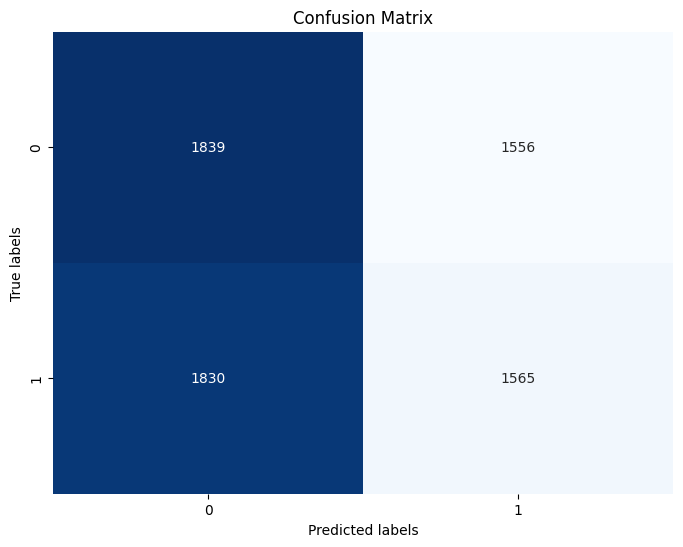

In [159]:
#Plotting the confusion matrix.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm_unbiased = confusion_matrix(selected_test_y, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_unbiased)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unbiased, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [160]:
# Calculate FP, TP, TN, and FN rates
FP = cm_unbiased[0, 1]
TP = cm_unbiased[1, 1]
TN = cm_unbiased[0, 0]
FN = cm_unbiased[1, 0]

# Print the rates
print(f"False Positives (FP): {FP}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

False Positives (FP): 1556
True Positives (TP): 1565
True Negatives (TN): 1839
False Negatives (FN): 1830


In [161]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*TP/(2*TP + FP + FN)

print("The precision for the SVM with linear kernel using unbiased training data set is ", precision)
print("The recall for the SVM with linear kernel is ", recall)
print("The f1 score for the SVM with linear kernel is ", f1_score)

The precision for the SVM with linear kernel using unbiased training data set is  0.5014418455623197
The recall for the SVM with linear kernel is  0.46097201767304863
The f1 score for the SVM with linear kernel is  0.4803560466543892


In [162]:
dummy = one_test_y[:2][:]
dummy = dummy.reset_index(drop=True)
dummy_list = dummy.tolist()
print(dummy_list)

[1, 1]


In [163]:
one_x = one_test_x[31:35][:]
one_y = one_test_y[31:35][:]
one_y = one_y.reset_index(drop=True)
one_y = one_y.tolist()
zero_x = zero_test_x[30:34][:]
zero_y = zero_test_y[30:34][:]
zero_y = zero_y.reset_index(drop=True)
zero_y = zero_y.tolist()

y_pred_one = unbiased_svm.predict(one_x)
y_pred_zero = unbiased_svm.predict(zero_x)

# ANSI escape codes for text color
class TextColors:
    RED = '\033[91m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    BLUE = '\033[94m'
    END = '\033[0m'  # Reset color to default

for index in range(len(y_pred_one)):
  print("True value is ", "Will get readmitted within 30 days" if one_y[index] == 1 else "Will not get readmitted within 30 days")
  print("Predicted as ", f"{TextColors.GREEN}Will get readmitted within 30 days{TextColors.END}" if y_pred_one[index] == 1 else f"{TextColors.RED}Will not get readmitted within 30 days{TextColors.END}")
  print()

for index in range(len(y_pred_one)):
  print("True value is ", "Will not get readmitted within 30 days" if zero_y[index] == 0 else "Will get readmitted within 30 days")
  print("Predicted as ", f"{TextColors.GREEN}Will not get readmitted within 30 days{TextColors.END}" if y_pred_zero[index] == 0 else f"{TextColors.RED}Will get readmitted within 30 days{TextColors.END}")
  print()

True value is  Will get readmitted within 30 days
Predicted as  Will get readmitted within 30 days

True value is  Will get readmitted within 30 days
Predicted as  Will not get readmitted within 30 days

True value is  Will get readmitted within 30 days
Predicted as  Will not get readmitted within 30 days

True value is  Will get readmitted within 30 days
Predicted as  Will get readmitted within 30 days

True value is  Will not get readmitted within 30 days
Predicted as  Will get readmitted within 30 days

True value is  Will not get readmitted within 30 days
Predicted as  Will not get readmitted within 30 days

True value is  Will not get readmitted within 30 days
Predicted as  Will get readmitted within 30 days

True value is  Will not get readmitted within 30 days
Predicted as  Will not get readmitted within 30 days



From above metrics we can say that our model has high false positive rate which is fine in our case. And the model has pretty less false negativity rate which resulted in good recall value of 0.75. Overall, the F1 score of 0.59 indicates that there is a good balance between precision and recall.

However, by plotting ROC and precision-recall curve, we can extract the good thresholdfor the SVM classifier. We can fine tune the model using the optimal threshold obtained from the plot.

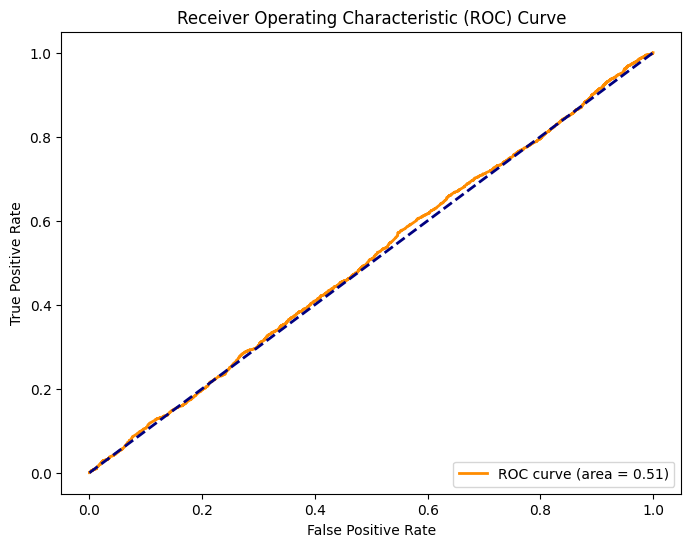

Optimal threshold from ROC curve: -1.00


In [164]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Plot ROC curve
fpr, tpr, thresholds_roc  = roc_curve(selected_test_y, y_pred_scores)
roc_auc = auc(fpr, tpr)

# Calculate Youden's J statistic for the ROC curve
youden = tpr - fpr
optimal_threshold_roc = thresholds_roc[np.argmax(youden)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"Optimal threshold from ROC curve: {optimal_threshold_roc:.2f}")

<ipython-input-165-8ad1cf5e7329>:6: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


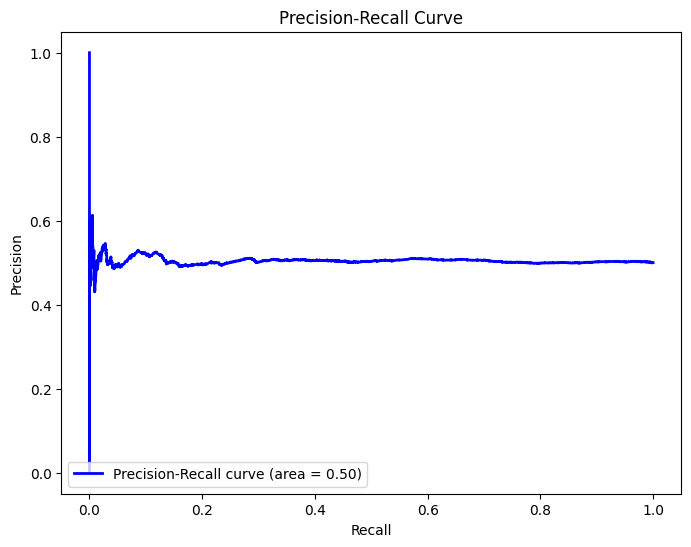

Optimal threshold from precision-recall curve: 1.00


In [165]:
# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(selected_test_y, y_pred_scores)
pr_auc = auc(recall, precision)

# Calculate F1 score for the precision-recall curve
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_pr = thresholds_pr[np.argmax(f1_scores)]

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

print(f"Optimal threshold from precision-recall curve: {optimal_threshold_pr:.2f}")

Experimenting with another kernel to see if it will improve models accuracy.

In [166]:
#Create a svm Classifier
'''
In Scikit-learn, the SVM implementation allows for regularization through the C parameter,
which controls the trade-off between maximizing the margin and minimizing the classification error.
A smaller value of C leads to a simpler decision boundary, which can help prevent overfitting.
 On the other hand, a larger C allows the model to fit the training data more closely, which may result in overfitting.
'''
poly_svm = svm.SVC(kernel='rbf', C=0.5, random_state=1) # Linear Kernel

#Train the model using the training sets
poly_svm.fit(selected_train_x, selected_train_y)

y_pred_train = poly_svm.predict(selected_train_x)
#Predict the response for test dataset
y_pred_test = poly_svm.predict(selected_test_x)
y_pred_scores = poly_svm.decision_function(selected_test_x)

In [167]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy with SVM model with polynomial kernel on train dataset :",metrics.accuracy_score(selected_train_y, y_pred_train))
print("Accuracy with SVM model with polynomial kernel on test dataset :",metrics.accuracy_score(selected_test_y, y_pred_test))


Accuracy with SVM model with polynomial kernel on train dataset : 0.5145851748958202
Accuracy with SVM model with polynomial kernel on test dataset : 0.5050073637702504


Confusion Matrix:
[[1332 2063]
 [1298 2097]]


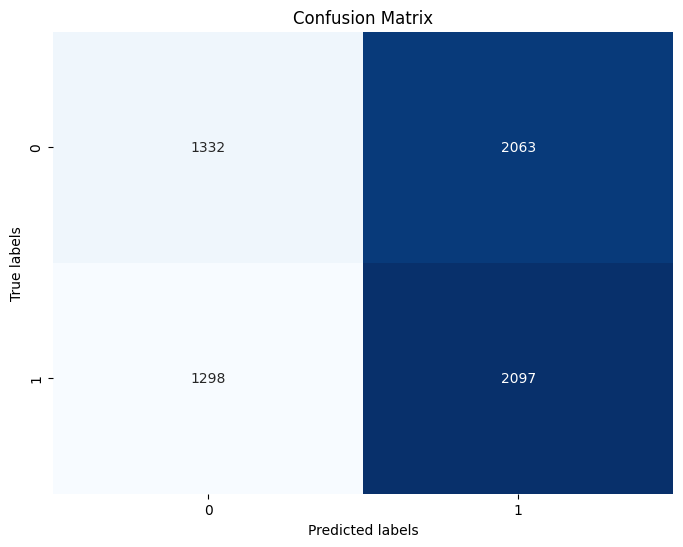

In [168]:
#Plotting the confusion matrix.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm_unbiased = confusion_matrix(selected_test_y, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_unbiased)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unbiased, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [169]:
# Calculate FP, TP, TN, and FN rates
FP = cm_unbiased[0, 1]
TP = cm_unbiased[1, 1]
TN = cm_unbiased[0, 0]
FN = cm_unbiased[1, 0]

# Print the rates
print(f"False Positives (FP): {FP}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

False Positives (FP): 2063
True Positives (TP): 2097
True Negatives (TN): 1332
False Negatives (FN): 1298


In [170]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*TP/(2*TP + FP + FN)

print("The precision for the SVM with linear kernel using unbiased training data set is ", precision)
print("The recall for the SVM with linear kernel is", recall)
print("The f1 score for the SVM with linear kernel is ", f1_score)

The precision for the SVM with linear kernel using unbiased training data set is  0.5040865384615385
The recall for the SVM with linear kernel is 0.6176730486008837
The f1 score for the SVM with linear kernel is  0.5551290536068828


Adding medical_speciality and diag_1 features which seem to be important as per EDA, to the training data set to improve accuracy

In [171]:
dummies_medical_spec = pd.get_dummies(data['medical_specialty'])
dummies_diag_1 = pd.get_dummies(data['diag_1'])

train_x_2 = pd.concat([train_x, dummies_medical_spec], axis = 1)
train_x_2 = pd.concat([train_x_2, dummies_diag_1], axis = 1)

In [172]:
print(train_x_2.columns.tolist())
train_x_2.columns = train_x_2.columns.astype(str)

['Caucasian', 'AfricanAmerican', 'Asian', 'Hispanic', 'Other', 'Gender_Male', 'Gender_Female', 'Gender_Unknown', 'age_converted', 'number_inpatient', 'number_outpatient', 'time_in_hospital', 'number_diagnoses', 'diabetesMed', 'number_emergency', 'diag_1_428', 'diag_2_250', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'AllergyandImmunology', 'Anesthesiology', 'Anesthesiology-Pediatric', 'Cardiology', 'Cardiology-Pediatric', 'DCPTEAM', 'Dentistry', 'Dermatology', 'Emergency/Trauma', 'Endocrinology', 'Endocrinology-Metabolism', 'Family/GeneralPractice', 'Gastroenterology', 'Gynecology', 'Hematology', 'Hematology/Oncology', 'Hospitalist', 'InfectiousDiseases', 'InternalMedicine', 'Nephrology', 'Neurology', 'Neurophysiology', 'Obsterics&Gynecology-GynecologicOnco', 'Obstetrics', 'ObstetricsandGynecology', 'Oncology', 'Ophthalmology', 'Orthopedics', 'Orthopedics-Reconstructive', 'Osteopath', 'Otolaryngology', 'OutreachServices', 'Pathology', 'Pediatrics', 'Pediatrics-A

In [173]:
# Split dataset into training set and test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train_x_2, train_y, test_size=0.3,random_state=109) # 70% training and 30% test

In [174]:
#Create a svm Classifier
model_2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model_2.fit(X_train_2, y_train_2)

#Predict the response for test dataset
y_pred_2 = model_2.predict(X_test_2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [175]:
print("Accuracy with SVM model after considering medical_speciality and diag_1 features is :",metrics.accuracy_score(y_test_2, y_pred_2))

Accuracy with SVM model after considering medical_speciality and diag_1 features is : 0.8842398416266819


The above accuracy of 88% is due to the data set used is not balanced, even though we added two new features.

### Trying RandomForestClassifier on balanced data set.

In [184]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion = "entropy", max_features = "log2", bootstrap = False, random_state=1)

RF.fit(selected_train_x, selected_train_y)

print("Train accuracy after fitting RFC with balanced data is ", RF.score(selected_train_x, selected_train_y))
print("Test accuracy after fitting RFC with balanced data is ", RF.score(selected_test_x, selected_test_y))

Train accuracy after fitting RFC with balanced data is  0.7846950372521783
Test accuracy after fitting RFC with balanced data is  0.498379970544919


In [185]:
y_pred_train = RF.predict(selected_train_x)
y_pred_test = RF.predict(selected_test_x)

from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy with Random Forest Classifier on train dataset :",metrics.accuracy_score(selected_train_y, y_pred_train))
print("Accuracy with Random Forest Classifier on test dataset :",metrics.accuracy_score(selected_test_y, y_pred_test))

Accuracy with Random Forest Classifier on train dataset : 0.7846950372521783
Accuracy with Random Forest Classifier on test dataset : 0.498379970544919


Confusion Matrix:
[[1881 1514]
 [1892 1503]]


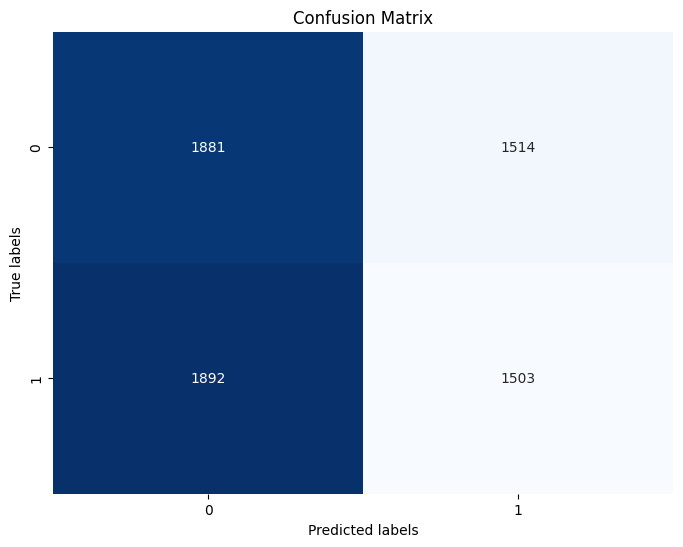

In [186]:
#Plotting the confusion matrix.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm_unbiased = confusion_matrix(selected_test_y, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_unbiased)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unbiased, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Though the random forest is giving high training accuracy, the number of false negatives are high compared to false positives. And in our probelm, high number of false negatives is fatal so this model can't be used in practice.

#### Fitting XG Boost

In [179]:
! pip install xgboost

In [193]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

In [194]:
params = {

    'max_depth': 7,
    'gamma' :0,
    'eta':.03,
    'subsample': 1,
    'colsample_bytree': 0.9,
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0
}

In [195]:
model2 = xgb.XGBClassifier(
    n_estimators=200,
    gamma=0.8,
    eta=0.015,
    learning_rate=0.008)
pipeline = Pipeline(steps=[('model', model2)])
model2.fit(selected_train_x, selected_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.015, eval_metric=None,
              feature_types=None, gamma=0.8, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.008, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [196]:
y_pred_train = model2.predict(selected_train_x)
#Predict the response for test dataset
y_pred_test = model2.predict(selected_test_x)

# Model Accuracy: how often is the classifier correct?
print("Accuracy with XG Boost on train dataset :",metrics.accuracy_score(selected_train_y, y_pred_train))
print("Accuracy with XG Boost on test dataset :",metrics.accuracy_score(selected_test_y, y_pred_test))

Accuracy with XG Boost on train dataset : 0.53971461043061
Accuracy with XG Boost on test dataset : 0.49661266568483065


Confusion Matrix:
[[1216 2179]
 [1239 2156]]


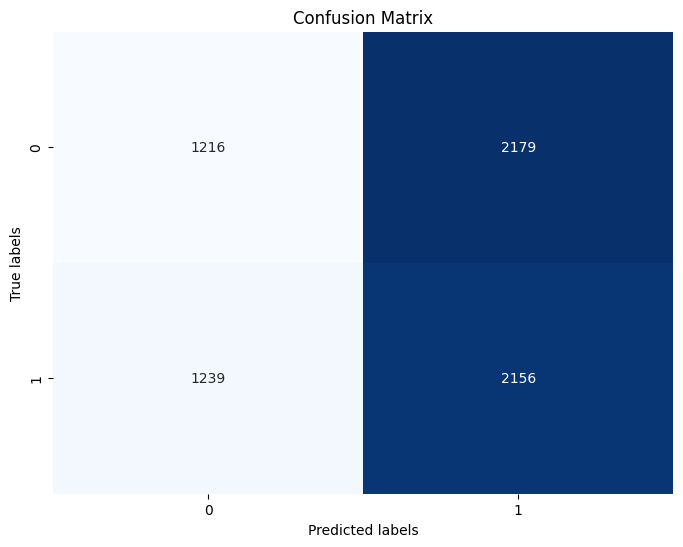

In [197]:
#Plotting the confusion matrix.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm_unbiased = confusion_matrix(selected_test_y, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_unbiased)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unbiased, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

XGBoosting gave good train accuracy and but test accuracy is not improved. Even though the number of false negatives are less when compared to the number of false positives, neural networks model should be tried to learn the complex features of the data set.

The intution behind choosing neural networks is in case of random forest and XGBoosting the test accuracy is not improved much. This indicates that the data set might have complex features which are not leanrnt by basic machine learning models. Whereas Neural Networks is proven to be best in learning complex features in the data set, so we are proceding with neural networks.

### Fitting Neural networks

In [198]:
from sklearn import neural_network
model1 = neural_network.MLPClassifier(random_state = 1, max_iter=250)
model1.fit(selected_train_x, selected_train_y)
y_pred_train = model1.predict(selected_train_x)
#Predict the response for test dataset
y_pred_test = model1.predict(selected_test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [199]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy with 100 layered Neural Network on train dataset :",metrics.accuracy_score(selected_train_y, y_pred_train))
print("Accuracy with 100 layered Neural Network on test dataset :",metrics.accuracy_score(selected_test_y, y_pred_test))

Accuracy with 100 layered Neural Network on train dataset : 0.5823967672685946
Accuracy with 100 layered Neural Network on test dataset : 0.5025036818851252


Confusion Matrix:
[[1330 2065]
 [1313 2082]]


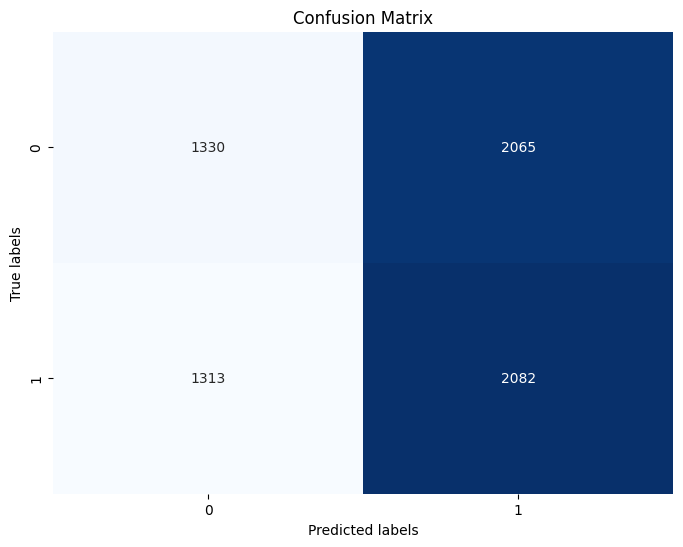

In [200]:
#Plotting the confusion matrix.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm_unbiased = confusion_matrix(selected_test_y, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_unbiased)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unbiased, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [201]:
# Extracting true positives, false positives, true negatives, and false negatives
tp = cm_unbiased[1, 1]
fp = cm_unbiased[0, 1]
tn = cm_unbiased[0, 0]
fn = cm_unbiased[1, 0]

# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.4f}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")



Sensitivity (Recall): 0.6133
Specificity: 0.3918


We can observe that the test accuracy is improved by one percent with neural networks. We tried different combinations of parameters of the `MLPClassifier`. The parameters include num of iterations, learning rate, hidden layers etc. Few combinations of the parameters caused the model to overfit but none of them improved the test accuracy.

The maximum test accuracy which we obtained is 50% with the neural networks. So we are finalizing neural networks as our best model for the data set considered.